<h1> Satellite Precipitation Data Analysis</h1>

<p> This project's goal is to analyze PERSIANN (Precipitation Estimation from Remotely Sensed Information using Artificial Neural Networks) 
dataset provided by CHRS Data Portal. </p>

<h2>Exploring the data</h2>

In [52]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
example_satellite_image_path = "./data/PERSIANN_6h2019011706.tif"

example_img = np.asarray(Image.open(example_satellite_image_path))
print("Data (tiff image) shape:", example_img.shape)

Data (tiff image) shape: (25, 42)


In [11]:
print("Data as array (row nr 10):", example_img[10])

Data as array (row nr 10): [-99.   -99.     0.     0.     0.     0.38   0.36   0.35   0.36   0.36
   0.63   0.36   0.8    0.59   0.8    0.78   0.25   0.25   0.     0.
   0.     0.     0.     0.     0.     0.     0.24   0.22   0.21   1.23
   1.02   0.81   1.35   1.64   1.56   1.26   0.81   0.56   0.75 -99.
 -99.   -99.  ]


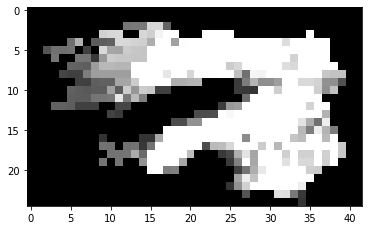

In [12]:
from matplotlib.colors import NoNorm
plt.imshow(example_img, cmap='gray', norm=NoNorm())

<h2>Data loading </h2>

In [69]:
import glob, os
import re
from datetime import datetime

data_path = "./data"
data_datetime_pattern = re.compile(r'^.*PERSIANN_6h(\d{10}).tif$')

def getDateTimeFromFileName(file_name):
    date_time_string = data_datetime_pattern.search(file_name).group(1)
    return datetime.strptime(date_time_string, '%Y%m%d%H')

def getTiffFileAsArray(file_name):
    return np.asarray(Image.open(file_name))

# get all files containing data
all_files = glob.glob(os.path.join(data_path, '*.tif'), recursive=False)

# load data into array of tuples
data = [(getDateTimeFromFileName(f), getTiffFileAsArray(f)) for f in all_files]
